In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Load the Brands dataset into a DataFrame
brands_df = pd.read_csv('/Users/nehasheth/Desktop/study-corpus/Fetch/Data_Analyst/Takehome_Data_January_2023/brands.csv')

# Load the Receipt items dataset into a DataFrame
receipt_items_df = pd.read_csv('/Users/nehasheth/Desktop/study-corpus/Fetch/Data_Analyst/Takehome_Data_January_2023/receipt_items.csv')

# Load the Receipts dataset into a DataFrame
receipts_df = pd.read_csv('/Users/nehasheth/Desktop/study-corpus/Fetch/Data_Analyst/Takehome_Data_January_2023/receipts.csv')

# Load the Users data 
users_df = pd.read_csv('/Users/nehasheth/Desktop/study-corpus/Fetch/Data_Analyst/Takehome_Data_January_2023/users.csv')



In [4]:
receipt_items_df.describe()

,ITEM_INDEX,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED
count,360377.000000,352621.000000,359685.000000,18952.000000
mean,8.386240,1.516872,9.229423,81.780583
std,11.659698,85.695401,178.977159,3185.766097
min,0.000000,-1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.750000,18.700000
50%,4.000000,1.000000,3.500000,34.800000
75%,11.000000,1.000000,7.130000,55.000000
max,145.000000,36556.000000,31005.990000,310059.900000


In [6]:
df_receipts1 = pd.merge(receipt_items_df, receipts_df, left_on='REWARDS_RECEIPT_ID', right_on='ID')

In [10]:
df_user_receipts = pd.merge(df_receipts1, users_df, left_on='USER_ID', right_on='ID')

In [12]:
#This is the final merged data of ALL files
df = pd.merge(df_user_receipts, brands_df, left_on='BRAND_CODE', right_on='BRAND_CODE')

In [14]:
print(df.isnull().sum())

REWARDS_RECEIPT_ID                  0
ITEM_INDEX                          0
REWARDS_RECEIPT_ITEM_ID             0
DESCRIPTION                     26787
BARCODE_x                     2651430
BRAND_CODE                    5137250
QUANTITY_PURCHASED             176294
TOTAL_FINAL_PRICE               13299
POINTS_EARNED                 5113136
REWARDS_GROUP                 4976584
ORIGINAL_RECEIPT_ITEM_TEXT      29510
MODIFY_DATE_x                       0
ID_x                                0
STORE_NAME                      11186
PURCHASE_DATE                   36420
PURCHASE_TIME                  216375
DATE_SCANNED                        0
TOTAL_SPENT                      5236
REWARDS_RECEIPT_STATUS              0
USER_ID                             0
USER_VIEWED                    790547
PURCHASED_ITEM_COUNT                0
CREATE_DATE                         0
PENDING_DATE                        0
MODIFY_DATE_y                     350
FLAGGED_DATE                  4896394
PROCESSED_DA

The final data has alot of missing values which may make it unfit for predictive modeling or ML models currently.

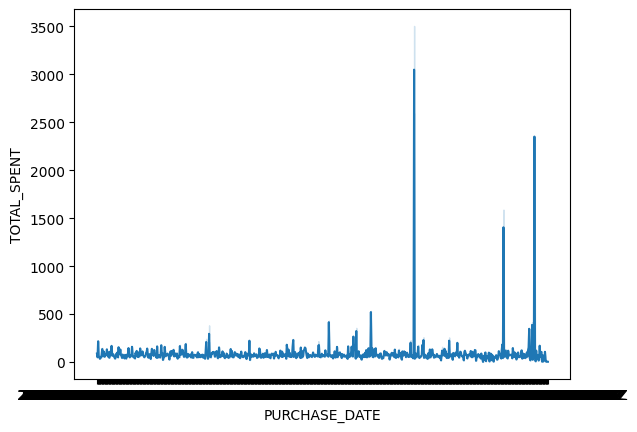

In [16]:
# Plot the distribution of total spent by purchase date
sns.lineplot(x='PURCHASE_DATE', y='TOTAL_SPENT', data=df)
plt.show()

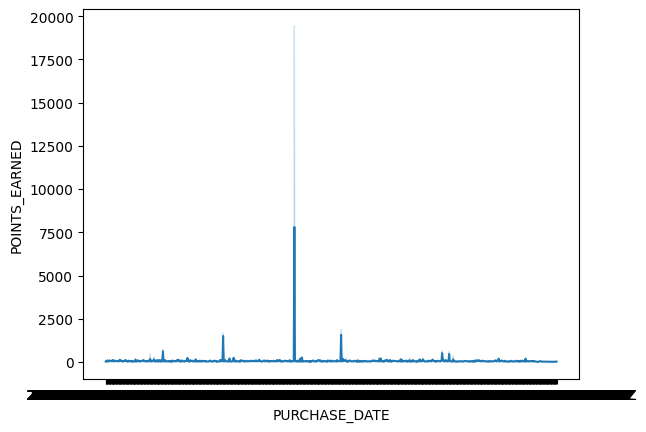

In [17]:
# Plot the distribution of points earned by purchase date
sns.lineplot(x='PURCHASE_DATE', y='POINTS_EARNED', data=df)
plt.show()

Some cool statistical analyses on this data -

In [22]:
# Check for correlations
print(df.corr())

/var/folders/2j/yhl24qcn2k50nx9_wxn6thh40000gn/T/ipykernel_19919/2294702633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


                      ITEM_INDEX  QUANTITY_PURCHASED  TOTAL_FINAL_PRICE  \
ITEM_INDEX              1.000000           -0.002458          -0.016435   
QUANTITY_PURCHASED     -0.002458            1.000000           0.000839   
TOTAL_FINAL_PRICE      -0.016435            0.000839           1.000000   
POINTS_EARNED          -0.007502            0.000075           0.998741   
TOTAL_SPENT             0.075492            0.000023           0.656219   
PURCHASED_ITEM_COUNT    0.169168            0.885701          -0.003938   
PROCESSED_DATE               NaN                 NaN                NaN   
DIGITAL_RECEIPT        -0.091721           -0.001057           0.006927   
BARCODE_y              -0.000419            0.000149           0.000057   

                      POINTS_EARNED  TOTAL_SPENT  PURCHASED_ITEM_COUNT  \
ITEM_INDEX                -0.007502     0.075492              0.169168   
QUANTITY_PURCHASED         0.000075     0.000023              0.885701   
TOTAL_FINAL_PRICE          

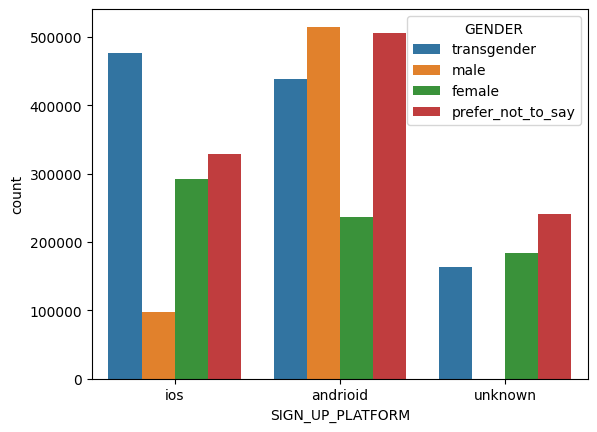

In [23]:
# Check for categorical correlations
sns.countplot(x='SIGN_UP_PLATFORM', data=df, hue='GENDER')
plt.show()

Using the brands data to conduct statistical analyses.

In [27]:
print("Missing values:")
print(brands_df.isna().sum())


Missing values:
ID                     0
BARCODE                0
BRAND_CODE            25
CPG_ID                 0
CATEGORY              27
CATEGORY_CODE         31
NAME                   0
ROMANCE_TEXT         103
RELATED_BRAND_IDS    243
dtype: int64


/var/folders/2j/yhl24qcn2k50nx9_wxn6thh40000gn/T/ipykernel_19919/239293172.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_date = receipts_df.groupby(pd.Grouper(freq='M')).sum()


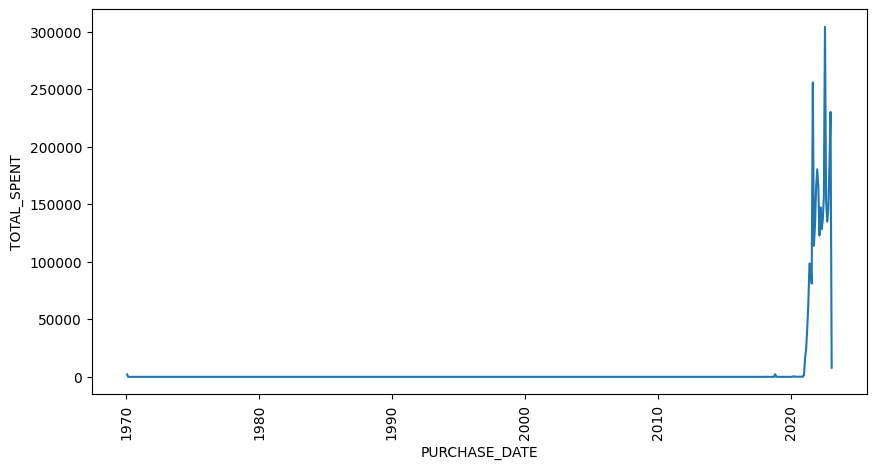

In [39]:
# Convert the 'PURCHASE_DATE' column to datetime format
receipts_df['PURCHASE_DATE'] = pd.to_datetime(receipts_df['PURCHASE_DATE'])

# Set the 'PURCHASE_DATE' column as the DataFrame index
receipts_df.set_index('PURCHASE_DATE', inplace=True)

# Group the DataFrame by the date
grouped_by_date = receipts_df.groupby(pd.Grouper(freq='M')).sum()

# Plot a line plot of the total spent over time
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_by_date, x=grouped_by_date.index, y='TOTAL_SPENT')
plt.xticks(rotation=90)
plt.show()